<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/master/Initializations_%5Be%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression dataset - California Housing dataset
> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing



Classification dataset - Fashion MNIST
> https://keras.io/api/datasets/fashion_mnist/

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

#### Regression - LeCun and He initialization

LeCun normalization and He initialization are used when the activation function is ReLu. Both initializations have draw from either guassian or normal distribution.

In LeCun, the weights are initialized with a Gaussian/Uniform distribution with a mean of zero and a standard deviation of sqrt(1/n), where n is the number of input units.

In He initialization, the weights are drawn from a Gaussian/Uniform distribution with a mean zero and standard deviation of sqrt(2/n).

In [ ]:
# Read regression dataset

housing_reg = fetch_california_housing()

In [ ]:
num_epochs_reg = 20
rmse_reg = pd.DataFrame()

In [ ]:
# Split into train, val and test set

X_train, X_test, y_train, y_test = train_test_split(housing_reg.data, housing_reg.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train[0]

array([   4.7069    ,   27.        ,    6.52325581,    1.11627907,
        873.        ,    3.38372093,   38.        , -120.97      ])

In [ ]:
# Model with default initialization - xavier uniform

model_reg = tf.keras.Sequential()
for _ in range(5):
    model_reg.add(tf.keras.layers.Dense(100, activation='relu'))
model_reg.add(tf.keras.layers.Dense(1))

# Compile model
model_reg.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg = model_reg.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_rmse', 'val_root_mean_squared_error':'val_rmse'})

Epoch 1/20
413/413 [==============================] - 4s 5ms/step - loss: 40.0666 - root_mean_squared_error: 6.3298 - val_loss: 1.9049 - val_root_mean_squared_error: 1.3802
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 2.2280 - root_mean_squared_error: 1.4926 - val_loss: 1.3936 - val_root_mean_squared_error: 1.1805
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 1.6299 - root_mean_squared_error: 1.2767 - val_loss: 1.6240 - val_root_mean_squared_error: 1.2744
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3803 - root_mean_squared_error: 1.1748 - val_loss: 0.8865 - val_root_mean_squared_error: 0.9416
Epoch 5/20
413/413 [==============================] - 2s 6ms/step - loss: 2.0163 - root_mean_squared_error: 1.4200 - val_loss: 1.1012 - val_root_mean_squared_error: 1.0494
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 0.8138 - root_mean_squared_error: 0.9021 - val_loss: 1.1637 - val

In [ ]:
# Model with LeCun Normal initialization 

model_reg_lecun_normal = tf.keras.Sequential()
for _ in range(5):
    model_reg_lecun_normal.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='lecun_normal'))
model_reg_lecun_normal.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_lecun_normal.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_lecun_normal = model_reg_lecun_normal.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_lecun_normal.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_lecun_normal_rmse', 'val_root_mean_squared_error':'val_lecun_normal_rmse'})

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 70.2165 - root_mean_squared_error: 8.3795 - val_loss: 26.8308 - val_root_mean_squared_error: 5.1798
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 3.3385 - root_mean_squared_error: 1.8271 - val_loss: 1.4104 - val_root_mean_squared_error: 1.1876
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 90.2641 - root_mean_squared_error: 9.5007 - val_loss: 1.5373 - val_root_mean_squared_error: 1.2399
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 5.8977 - root_mean_squared_error: 2.4285 - val_loss: 1.7944 - val_root_mean_squared_error: 1.3395
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 1.5664 - root_mean_squared_error: 1.2516 - val_loss: 11.8237 - val_root_mean_squared_error: 3.4386
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 2.0665 - root_mean_squared_error: 1.4375 - val_loss: 1.3897 - 

In [ ]:
# Model with LeCun Uniform initialization 

model_reg_lecun_uniform = tf.keras.Sequential()
for _ in range(5):
    model_reg_lecun_uniform.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='lecun_uniform'))
model_reg_lecun_uniform.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_lecun_uniform.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_lecun_uniform = model_reg_lecun_uniform.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_lecun_uniform.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_lecun_uniform_rmse', 'val_root_mean_squared_error':'val_lecun_uniform_rmse'})

Epoch 1/20
413/413 [==============================] - 2s 2ms/step - loss: 633.5954 - root_mean_squared_error: 25.1713 - val_loss: 2.4446 - val_root_mean_squared_error: 1.5635
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 8.9610 - root_mean_squared_error: 2.9935 - val_loss: 1.6063 - val_root_mean_squared_error: 1.2674
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 1.7066 - root_mean_squared_error: 1.3064 - val_loss: 4.6387 - val_root_mean_squared_error: 2.1538
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 24.1650 - root_mean_squared_error: 4.9158 - val_loss: 1.3369 - val_root_mean_squared_error: 1.1563
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 1.3647 - root_mean_squared_error: 1.1682 - val_loss: 1.5768 - val_root_mean_squared_error: 1.2557
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 3.6701 - root_mean_squared_error: 1.9157 - val_loss: 2.2502 - 

In [ ]:
# Model with He normal initialization 

model_reg_he_normal = tf.keras.Sequential()
for _ in range(5):
    model_reg_he_normal.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model_reg_he_normal.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_he_normal.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_he_normal = model_reg_he_normal.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_he_normal.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_he_normal_rmse', 'val_root_mean_squared_error':'val_he_normal_rmse'})

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 5630.0244 - root_mean_squared_error: 75.0335 - val_loss: 14.9955 - val_root_mean_squared_error: 3.8724
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 41.1721 - root_mean_squared_error: 6.4165 - val_loss: 6.7678 - val_root_mean_squared_error: 2.6015
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 260.9822 - root_mean_squared_error: 16.1549 - val_loss: 2265.4812 - val_root_mean_squared_error: 47.5971
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 536.9331 - root_mean_squared_error: 23.1718 - val_loss: 5.4392 - val_root_mean_squared_error: 2.3322
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 15.1305 - root_mean_squared_error: 3.8898 - val_loss: 3.6680 - val_root_mean_squared_error: 1.9152
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 169.2596 - root_mean_squared_error: 13.0100 - val

In [ ]:
# Model with He Uniform initialization 

model_reg_he_uniform = tf.keras.Sequential()
for _ in range(5):
    model_reg_he_uniform.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_reg_he_uniform.add(tf.keras.layers.Dense(1))

# Compile model
model_reg_he_uniform.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error , metrics=['RootMeanSquaredError'])

history_reg_he_uniform = model_reg_he_uniform.fit(X_train, y_train, epochs=num_epochs_reg, validation_data=(X_val, y_val))

rmse_reg = pd.concat([rmse_reg, pd.DataFrame(history_reg_he_uniform.history)[['root_mean_squared_error', 'val_root_mean_squared_error']]], axis=1).rename(
    columns={'root_mean_squared_error':'train_he_uniform_rmse', 'val_root_mean_squared_error':'val_he_uniform_rmse'})

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 2418.7795 - root_mean_squared_error: 49.1811 - val_loss: 3.9976 - val_root_mean_squared_error: 1.9994
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 52.6304 - root_mean_squared_error: 7.2547 - val_loss: 3.4588 - val_root_mean_squared_error: 1.8598
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 226.1240 - root_mean_squared_error: 15.0374 - val_loss: 12.8006 - val_root_mean_squared_error: 3.5778
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 124.2757 - root_mean_squared_error: 11.1479 - val_loss: 3.5554 - val_root_mean_squared_error: 1.8856
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 3.4280 - root_mean_squared_error: 1.8515 - val_loss: 4.0192 - val_root_mean_squared_error: 2.0048
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 77.6231 - root_mean_squared_error: 8.8104 - val_loss: 

In [ ]:
rmse_reg

,train_rmse,val_rmse,train_lecun_normal_rmse,val_lecun_normal_rmse,train_lecun_uniform_rmse,val_lecun_uniform_rmse,train_he_normal_rmse,val_he_normal_rmse,train_he_uniform_rmse,val_he_uniform_rmse
0,6.329820,1.380180,8.379531,5.179841,25.171322,1.563530,75.033485,3.872397,49.181087,1.999406
1,1.492645,1.180518,1.827148,1.187604,2.993493,1.267382,6.416546,2.601492,7.254683,1.859785
2,1.276685,1.274355,9.500740,1.239862,1.306358,2.153772,16.154945,47.597073,15.037419,3.577791
3,1.174844,0.941562,2.428522,1.339550,4.915789,1.156251,23.171818,2.332208,11.147903,1.885579
4,1.419963,1.049366,1.251559,3.438565,1.168210,1.255716,3.889800,1.915200,1.851475,2.004786
5,0.902114,1.078746,1.437542,1.178857,1.915743,1.500064,13.009979,6.120505,8.810399,1.092253
6,0.922575,0.920924,1.277263,1.400801,1.990995,1.280130,12.459590,1.286911,1.790938,4.425785
7,0.944319,0.844007,1.078650,0.990565,1.476956,1.538648,4.944838,1.502764,1.268254,1.246331
8,0.937525,0.866918,1.099770,1.098366,1.172348,2.323744,2.145288,1.723495,2.364624,0.991244
9,0.934323,1.004953,1.044980,1.028803,1.779222,1.030940,2.065496,3.384718,2.703844,1.449825


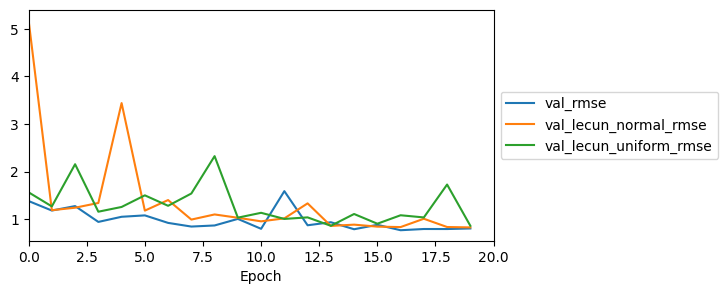

In [ ]:
# Visualize RMSE

rmse_reg[['val_rmse', 'val_lecun_normal_rmse', 'val_lecun_uniform_rmse']].plot(figsize=(6, 3), xlim=[0, num_epochs_reg], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

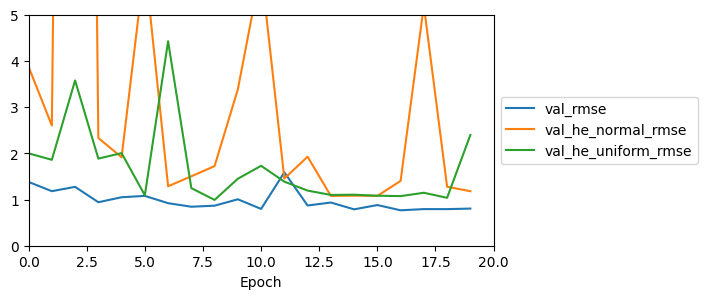

In [ ]:
# Visualize RMSE

rmse_reg[['val_rmse', 'val_he_normal_rmse', 'val_he_uniform_rmse']].plot(figsize=(6, 3), xlim=[0, num_epochs_reg], ylim=[0,5], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

1. As we see from above two graphs, the val_rmse is lowest with default intialization - glorot uniform. 
2. LeCun works better than He initialization.
3. Within LeCun types, uniform initialization generalizes better. Similarly, for He initialization, uniform does better than normal.

#### Classification - Standard normal and xavier initialization

Normal initialization can be used with any activation function. Xavier is used with sigmoid or softmax activations.

Normal Initialization: The weights and biases are initialized using a Gaussian distribution with a mean of zero and a standard deviation of one

Xavier Initialization: The weights are initialized with a Gaussian distribution with a mean of zero and a standard deviation of sqrt(1/n), where n is the average number of input and output units.

In [ ]:
# Read dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split into train into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
num_epochs_classi = 10
acc_classi = pd.DataFrame()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

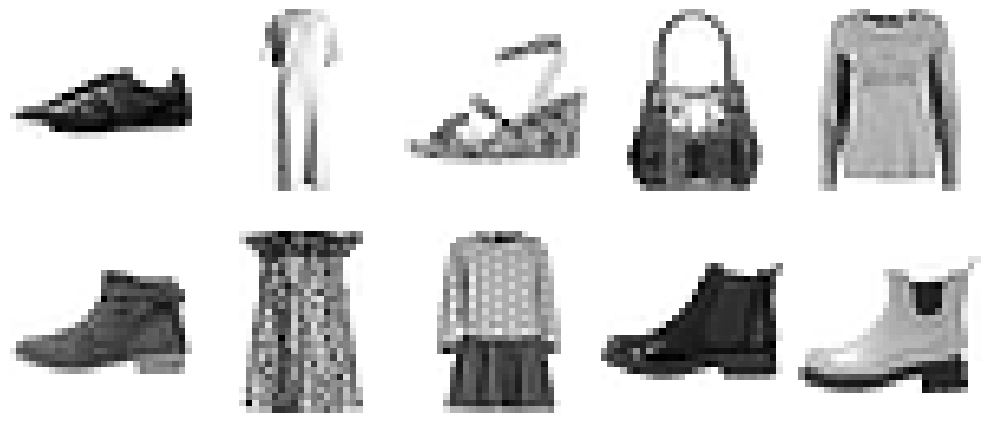

In [ ]:
# Training images

num_images = 10
images = X_train.take(num_images)

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in zip(range(num_images), axes.ravel()):
  ax.imshow(X_train[i], cmap='binary')
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Reshape and Normalize pixels in images 

X_train, X_val, X_test = X_train.reshape(-1, 28, 28, 1) /255.0, X_val.reshape(-1, 28, 28, 1) /255.0, X_test.reshape(-1, 28, 28, 1) /255.0

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Model with default initialization - glorot/xavier uniform

model_classi = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi = model_classi.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_acc', 'val_accuracy':'val_acc'})

Epoch 1/10
1500/1500 [==============================] - 42s 27ms/step - loss: 0.4821 - accuracy: 0.8261 - val_loss: 0.3505 - val_accuracy: 0.8712
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3236 - accuracy: 0.8829 - val_loss: 0.3100 - val_accuracy: 0.8888
Epoch 3/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2755 - accuracy: 0.8984 - val_loss: 0.2907 - val_accuracy: 0.8947
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2413 - accuracy: 0.9109 - val_loss: 0.2562 - val_accuracy: 0.9081
Epoch 5/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2140 - accuracy: 0.9205 - val_loss: 0.2538 - val_accuracy: 0.9071
Epoch 6/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1876 - accuracy: 0.9299 - val_loss: 0.2685 - val_accuracy: 0.9065
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1689 - accuracy: 0.9371 - val_loss: 0.2605 -

In [ ]:
# Model with Normal initialization

model_classi_normal = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1)),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi_normal.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi_normal = model_classi_normal.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi_normal.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_normal_acc', 'val_accuracy':'val_normal_acc'})

Epoch 1/10
1500/1500 [==============================] - 36s 23ms/step - loss: 27.1474 - accuracy: 0.7119 - val_loss: 9.7072 - val_accuracy: 0.7682
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 6.3863 - accuracy: 0.7809 - val_loss: 3.9694 - val_accuracy: 0.7903
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 2.3745 - accuracy: 0.7910 - val_loss: 1.6425 - val_accuracy: 0.7829
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 1.0521 - accuracy: 0.7947 - val_loss: 1.0086 - val_accuracy: 0.7902
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.7150 - accuracy: 0.7995 - val_loss: 0.7313 - val_accuracy: 0.7856
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.5966 - accuracy: 0.8069 - val_loss: 0.6545 - val_accuracy: 0.8038
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.5324 - accuracy: 0.8179 - val_loss: 0.6115 

In [ ]:
# Model with Xavier normal/ glorot initialization

model_classi_xavier = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1), kernel_initializer='glorot_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_normal'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_classi_xavier.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Train model
history_classi_xavier = model_classi_xavier.fit(X_train, y_train, epochs=num_epochs_classi, validation_data=(X_val, y_val))

acc_classi = pd.concat([acc_classi, pd.DataFrame(history_classi_xavier.history)[['accuracy', 'val_accuracy']]], axis=1).rename(
    columns={'accuracy':'train_xavier_acc', 'val_accuracy':'val_xavier_acc'})

Epoch 1/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.4678 - accuracy: 0.8307 - val_loss: 0.3487 - val_accuracy: 0.8726
Epoch 2/10
1500/1500 [==============================] - 37s 24ms/step - loss: 0.3128 - accuracy: 0.8850 - val_loss: 0.3008 - val_accuracy: 0.8881
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2651 - accuracy: 0.9033 - val_loss: 0.3044 - val_accuracy: 0.8909
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2321 - accuracy: 0.9139 - val_loss: 0.2708 - val_accuracy: 0.9006
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2039 - accuracy: 0.9249 - val_loss: 0.2487 - val_accuracy: 0.9066
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1814 - accuracy: 0.9309 - val_loss: 0.2649 - val_accuracy: 0.9030
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1599 - accuracy: 0.9392 - val_loss: 0.2585 -

In [ ]:
acc_classi

,train_acc,val_acc,train_normal_acc,val_normal_acc,train_xavier_acc,val_xavier_acc
0,0.826063,0.871167,0.711937,0.768167,0.830667,0.872583
1,0.882854,0.888833,0.780854,0.790250,0.885021,0.888083
2,0.898417,0.894667,0.790958,0.782917,0.903292,0.890917
3,0.910875,0.908083,0.794667,0.790167,0.913896,0.900583
4,0.920521,0.907083,0.799458,0.785583,0.924917,0.906583
5,0.929937,0.906500,0.806917,0.803833,0.930917,0.903000
6,0.937083,0.909833,0.817917,0.804750,0.939208,0.910083
7,0.944562,0.910750,0.829313,0.822333,0.946229,0.906000
8,0.950854,0.911750,0.842146,0.830000,0.953917,0.910167
9,0.955917,0.902167,0.850688,0.839333,0.958646,0.909917


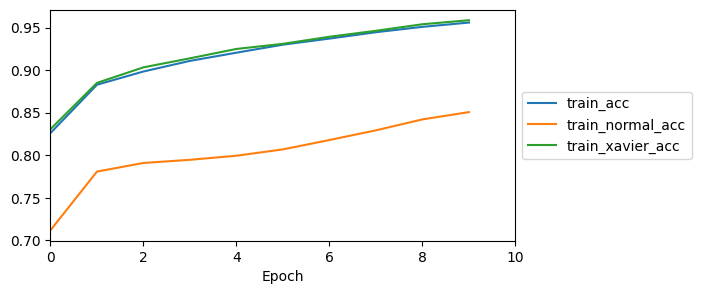

In [ ]:
# Visualize accuracy

acc_classi[['train_acc', 'train_normal_acc', 'train_xavier_acc']].plot(figsize=(6, 3), xlim=[0, num_epochs_classi], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

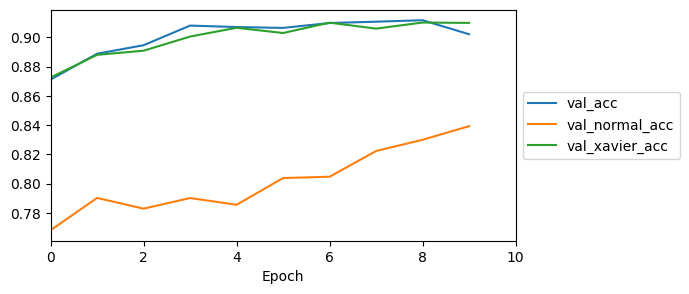

In [ ]:
# Visualize accuracy

acc_classi[['val_acc', 'val_normal_acc', 'val_xavier_acc']].plot(figsize=(6, 3), xlim=[0, num_epochs_classi], xlabel='Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Using normal and xavier normal initialization for classifying images in fashion nist data shows that the training and validation accuracy is very high for default and xavier normal initialization wheres it lowers when the weights are intialized using a normal distribution.